In [46]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')
# Import LISC code
from lisc import Counts
from lisc.utils import save_object, load_object
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap
# Import custom project code
import sys
sys.path.append('/home/b1044271/Columbia/bratios')

# Import the Base object used in LISC
from lisc.objects.base import Base

import csv
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lisc.collect import collect_info, collect_counts
from lisc.plts.utils import get_cmap
from lisc.plts.words import plot_years
from lisc.plts.counts import plot_matrix

# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/ERPscanr-main/code/")

from plts import plot_year_comparison

In [47]:
db = 'pubmed'

# Set up some terms to search for
terms = [['Aperiodic', '1/f', 'non-oscillatory','slope', 'exponent'], 
                  ['brain oscillations', 'brain rhythms'], 
                  [ 'complexity', 'entropy']]
inclusions = [['sleep'], ['sleep'], ['sleep']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts1 = Counts()
counts1.add_terms(terms)
counts1.add_terms(inclusions, term_type='inclusions')

# Collect co-occurrence data
counts1.run_collection(verbose=True)
X1 = counts1.check_counts()

Running counts for:  Aperiodic
Running counts for:  brain oscillations
Running counts for:  complexity
The number of documents found for each search term is:
  'Aperiodic'            -    832
  'brain oscillations'   -    160
  'complexity'           -   1480


In [10]:
collect_counts?

In [48]:
start_decade, end_decade = 1992, 2022
decades = list(range(start_decade, end_decade, 10))
    
# Define a list of modalities of interest, with synonyms
modality_terms = [['Aperiodic', '1/f', 'non-oscillatory','slope', 'exponent'],
                ['Aperiodic', '1/f', 'non-oscillatory','slope', 'exponent'] ]

inclusions = [['sleep'],['brain']]



inclusions_b = [['brain']]

# Define a list of labels to use for the method terms
modality_labels = [lst[0] for lst in modality_terms]

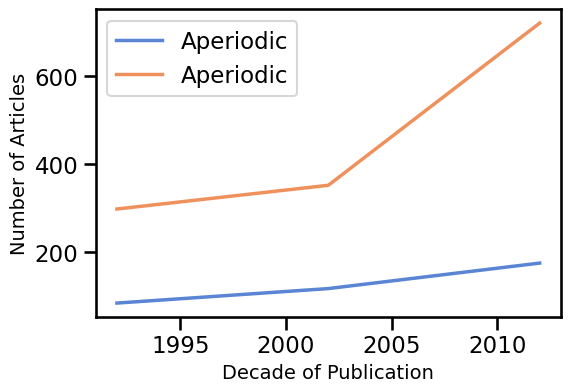

In [49]:
# Notebook settings
SAVE_FIG = False
SAVE_DATA = False
RUN_COLLECTION = True
# Collect information across each decade of interest
if RUN_COLLECTION:
    
    decade_counts = []
    for start_year in decades:

        count, _ = collect_counts(modality_terms, inclusions,
                                  collect_coocs=False,
                                  mindate=str(start_year) + '/01/01',
                                  maxdate=str(start_year+5) + '/12/31')
        decade_counts.append(count)

    # Convert the collected data into an array, of [n_terms, decade_counts]
    decade_counts = np.array(decade_counts).T
    
    if SAVE_DATA:
        # Save out the collected data for the method counts by decade
        for ind, label in enumerate(modality_labels):
            for decade, count in zip(decades, decade_counts):
                with open(data_dir / 'decades' / (label + '.csv'), 'w') as save_file:
                    for decade, count in zip(decades, decade_counts[ind, :]):
                        save_file.write(str(decade) + ',' + str(count) +'\n')
                        
else:
    decade_counts = []
    for m_term in modality_labels:
        with open(data_dir / 'decades'/ (m_term + '.csv'), 'r') as f_obj:
            count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')
        decade_counts.append(count)
    decade_counts = np.array(decade_counts)
    
# PLOTTING    
figs_dir = Path('/home/b1044271/Columbia')
data_dir = Path('/home/b1044271/Columbia')

# Plot the popularity of each modality across the decades
plot_year_comparison(decades, decade_counts, modality_labels,
                     save_fig=SAVE_FIG, file_name='modality_decades.pdf', directory=figs_dir)    

plt.savefig('Aperiodic_both_meta.svg', bbox_inches='tight', dpi =500)